In [100]:
!pip install pandas matplotlib seaborn scikit-learn

In [101]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [102]:
data_train = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')
data_train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [103]:
missing_per_column = data_train.isnull().sum()
print(missing_per_column)

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64


In [104]:
print(data_train.shape)

(1460, 81)


In [105]:
data_train.drop('Id', axis=1, inplace=True)

data_train.shape

(1460, 80)

In [106]:
data_train.describe()

MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1460.000000  1201.000000    1460.000000  1460.000000  1460.000000   
mean     56.897260    70.049958   10516.828082     6.099315     5.575342   
std      42.300571    24.284752    9981.264932     1.382997     1.112799   
min      20.000000    21.000000    1300.000000     1.000000     1.000000   
25%      20.000000    59.000000    7553.500000     5.000000     5.000000   
50%      50.000000    69.000000    9478.500000     6.000000     5.000000   
75%      70.000000    80.000000   11601.500000     7.000000     6.000000   
max     190.000000   313.000000  215245.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  ...  \
count  1460.000000   1460.000000  1452.000000  1460.000000  1460.000000  ...   
mean   1971.267808   1984.865753   103.685262   443.639726    46.549315  ...   
std      30.202904     20.645407   181.066207   456.098091   161.319273  ...   
min    1872.000000   1950.000000     0.000000     0.000000     0.000000  ...   
25%    1954.000000   1967.000000     0.000000     0.000000     0.000000  ...   
50%    1973.000000   1994.000000     0.000000   383.500000     0.000000  ...   
75%    2000.000000   2004.000000   166.000000   712.250000     0.000000  ...   
max    2010.000000   2010.000000  1600.000000  5644.000000  1474.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 37 columns]

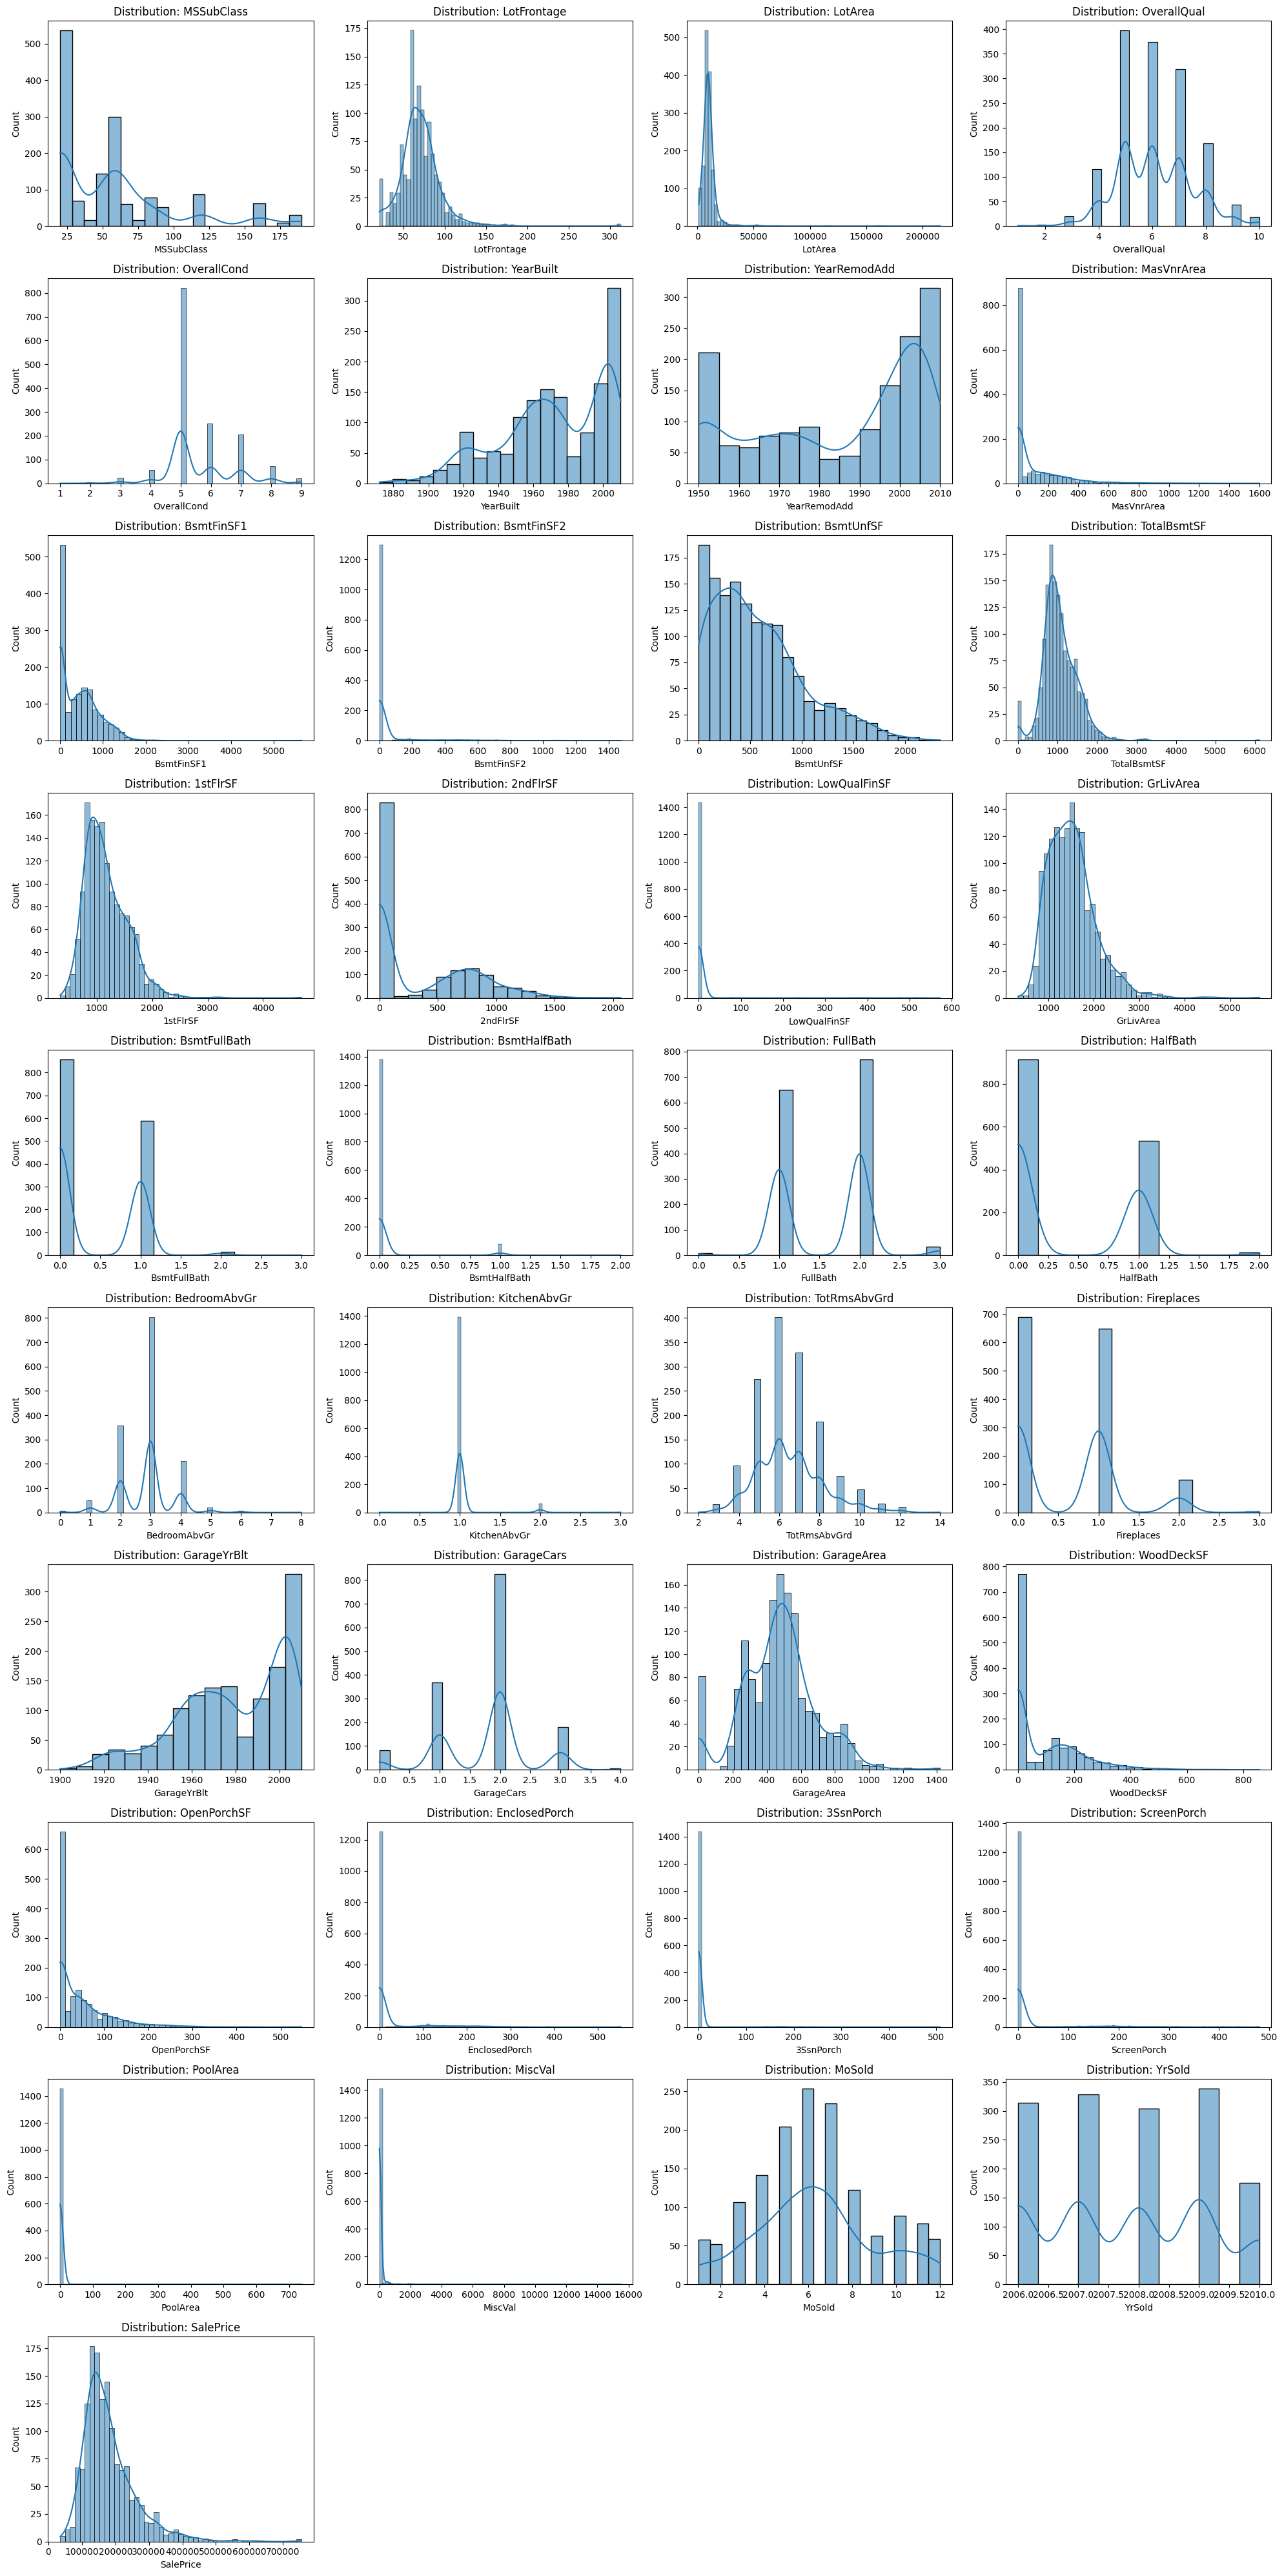

In [107]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_cols = data_train.select_dtypes(include=['number']).columns

num_cols = len(numeric_cols)
cols = 4 
rows = (num_cols + cols - 1) // cols

plt.figure(figsize=(5 * cols, 4 * rows))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(rows, cols, i)
    sns.histplot(data_train[col].dropna(), kde=True)
    plt.title(f'Distribution: {col}')

plt.tight_layout()
plt.show()

In [108]:
print("Skewness: %f" % data_train['SalePrice'].skew())
print("Kurtosis: %f" % data_train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


In [109]:
print(data_train['SalePrice'].sort_values(ascending=False).head(10))

691     755000
1182    745000
1169    625000
898     611657
803     582933
1046    556581
440     555000
769     538000
178     501837
798     485000
Name: SalePrice, dtype: int64


In [110]:
print(data_train['SalePrice'].sort_values(ascending=True).head(10))

495     34900
916     35311
968     37900
533     39300
30      40000
710     52000
1337    52500
705     55000
1325    55000
812     55993
Name: SalePrice, dtype: int64


In [111]:
data_train = data_train[data_train['SalePrice'] >= 50000]

In [112]:
print("Before removing the highest prices houses:", data_train['SalePrice'].shape)

data_train['SalePrice'].describe()


Before removing the highest prices houses: (1455,)


count      1455.000000
mean     181414.113402
std       79131.560787
min       52000.000000
25%      130000.000000
50%      163500.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [113]:
data_train = data_train[data_train['SalePrice'] <= 500000]
print("After removing the highest prices houses:", data_train['SalePrice'].shape)

data_train['SalePrice'].describe()

After removing the highest prices houses: (1446,)


count      1446.000000
mean     178759.700553
std       71535.840272
min       52000.000000
25%      130000.000000
50%      162950.000000
75%      213187.500000
max      485000.000000
Name: SalePrice, dtype: float64

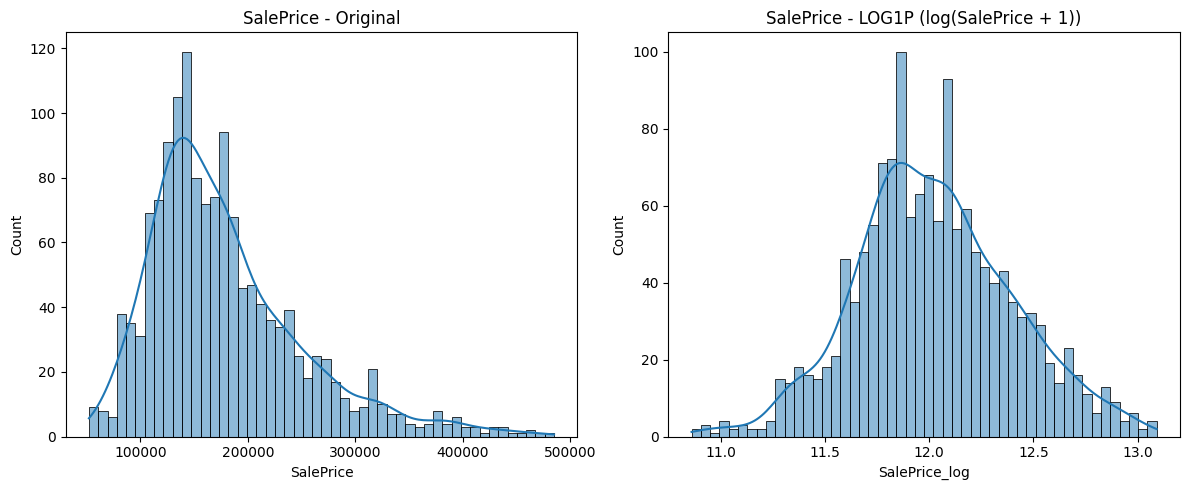

In [114]:
data_train['SalePrice_log'] = np.log1p(data_train['SalePrice'])

# Porównanieprzed i po 
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(data_train['SalePrice'], bins=50, kde=True, ax=axes[0])
axes[0].set_title("SalePrice - Original")

sns.histplot(data_train['SalePrice_log'], bins=50, kde=True, ax=axes[1])
axes[1].set_title("SalePrice - LOG1P (log(SalePrice + 1))")

plt.tight_layout()
plt.show()

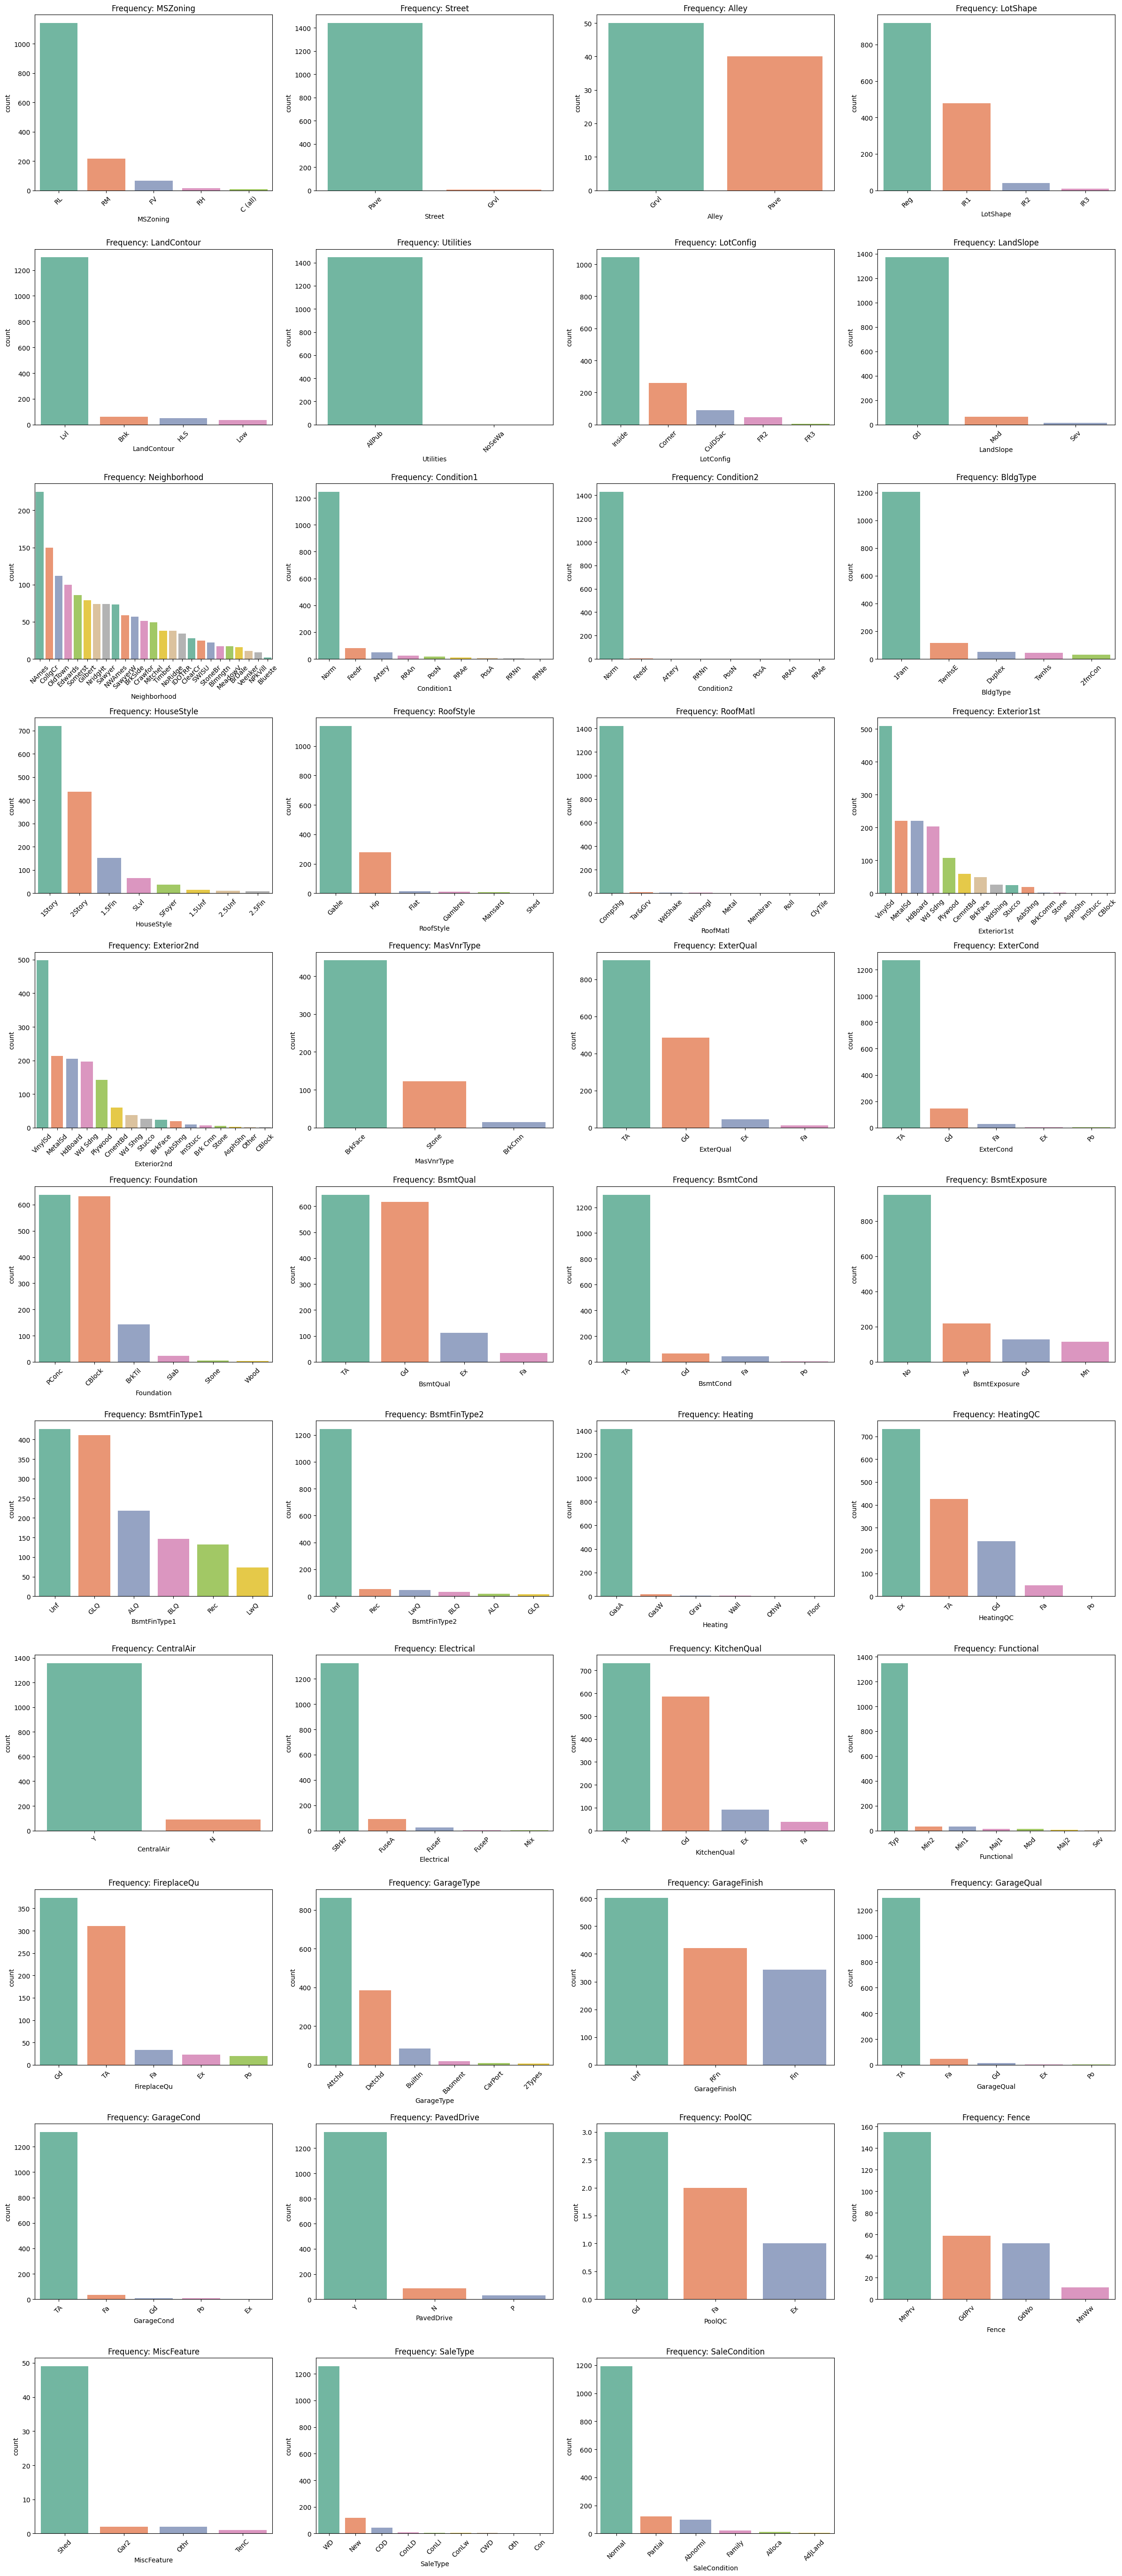

In [115]:
cat_cols = data_train.select_dtypes(include=['object', 'category']).columns

num_cols = len(cat_cols)
cols = 4
rows = (num_cols + cols - 1) // cols

plt.figure(figsize=(6 * cols, 5 * rows))  

for i, col in enumerate(cat_cols, 1):
    plt.subplot(rows, cols, i)
    sns.countplot(data=data_train, x=col, order=data_train[col].value_counts().index, palette='Set2')
    plt.title(f'Frequency: {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()

plt.show()

In [116]:
missing_percent = data_train.isnull().mean() * 100

missing_percent = missing_percent.sort_values(ascending=False)

print(missing_percent.head(20))

PoolQC          99.585062
MiscFeature     96.265560
Alley           93.775934
Fence           80.843707
MasVnrType      59.889350
FireplaceQu     47.372061
LotFrontage     17.911480
GarageYrBlt      5.394191
GarageFinish     5.394191
GarageQual       5.394191
GarageCond       5.394191
GarageType       5.394191
BsmtFinType2     2.558783
BsmtExposure     2.558783
BsmtFinType1     2.489627
BsmtQual         2.489627
BsmtCond         2.489627
MasVnrArea       0.553250
Electrical       0.069156
BldgType         0.000000
dtype: float64


In [117]:
cols_to_drop = missing_percent[missing_percent > 40].index.tolist()

print(f"Columns to remove : ({len(cols_to_drop)}): {cols_to_drop}")

data_cleaned = data_train.drop(columns=cols_to_drop)

print(f"Dataset shape data_train: {data_train.shape}")
print(f"Dataset with removed columns: {data_cleaned.shape}")

Columns to remove : (6): ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'MasVnrType', 'FireplaceQu']
Dataset shape data_train: (1446, 81)
Dataset with removed columns: (1446, 75)


In [118]:
num_cols = data_cleaned.select_dtypes(include='number')

correlations = num_cols.corr()['SalePrice'].sort_values(key=abs, ascending=False)

print(correlations.head(20))

SalePrice        1.000000
SalePrice_log    0.966878
OverallQual      0.800481
GrLivArea        0.684579
GarageCars       0.650590
GarageArea       0.629900
TotalBsmtSF      0.594012
1stFlrSF         0.585522
FullBath         0.549542
YearBuilt        0.540110
YearRemodAdd     0.526378
TotRmsAbvGrd     0.507719
GarageYrBlt      0.504293
Fireplaces       0.467108
MasVnrArea       0.441416
BsmtFinSF1       0.354936
OpenPorchSF      0.348625
LotFrontage      0.336390
WoodDeckSF       0.329422
2ndFlrSF         0.292465
Name: SalePrice, dtype: float64


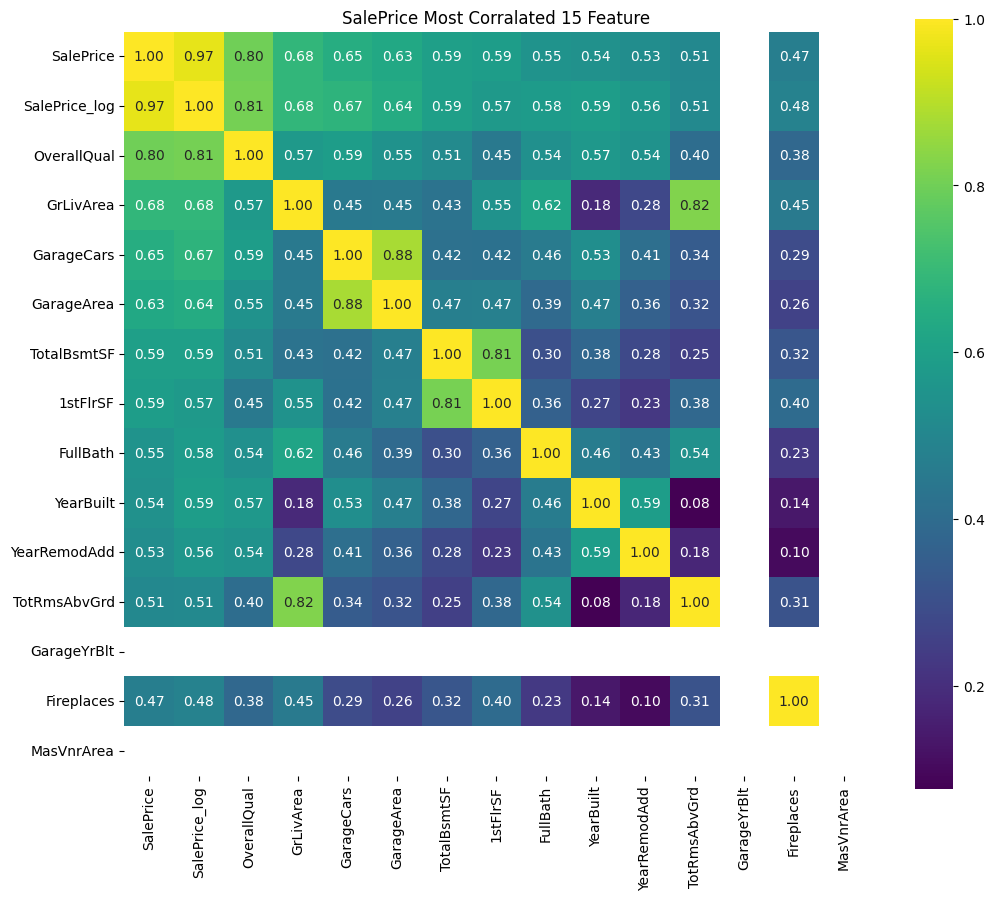

In [119]:
corrmat = data_cleaned.corr(numeric_only=True)

k = 15
top_cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(data_cleaned[top_cols].values.T)

plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, square=True, fmt='.2f', 
            annot_kws={'size': 10}, yticklabels=top_cols.values, xticklabels=top_cols.values,
            cmap='viridis')
plt.title(f'SalePrice Most Corralated {k} Feature')
plt.show()

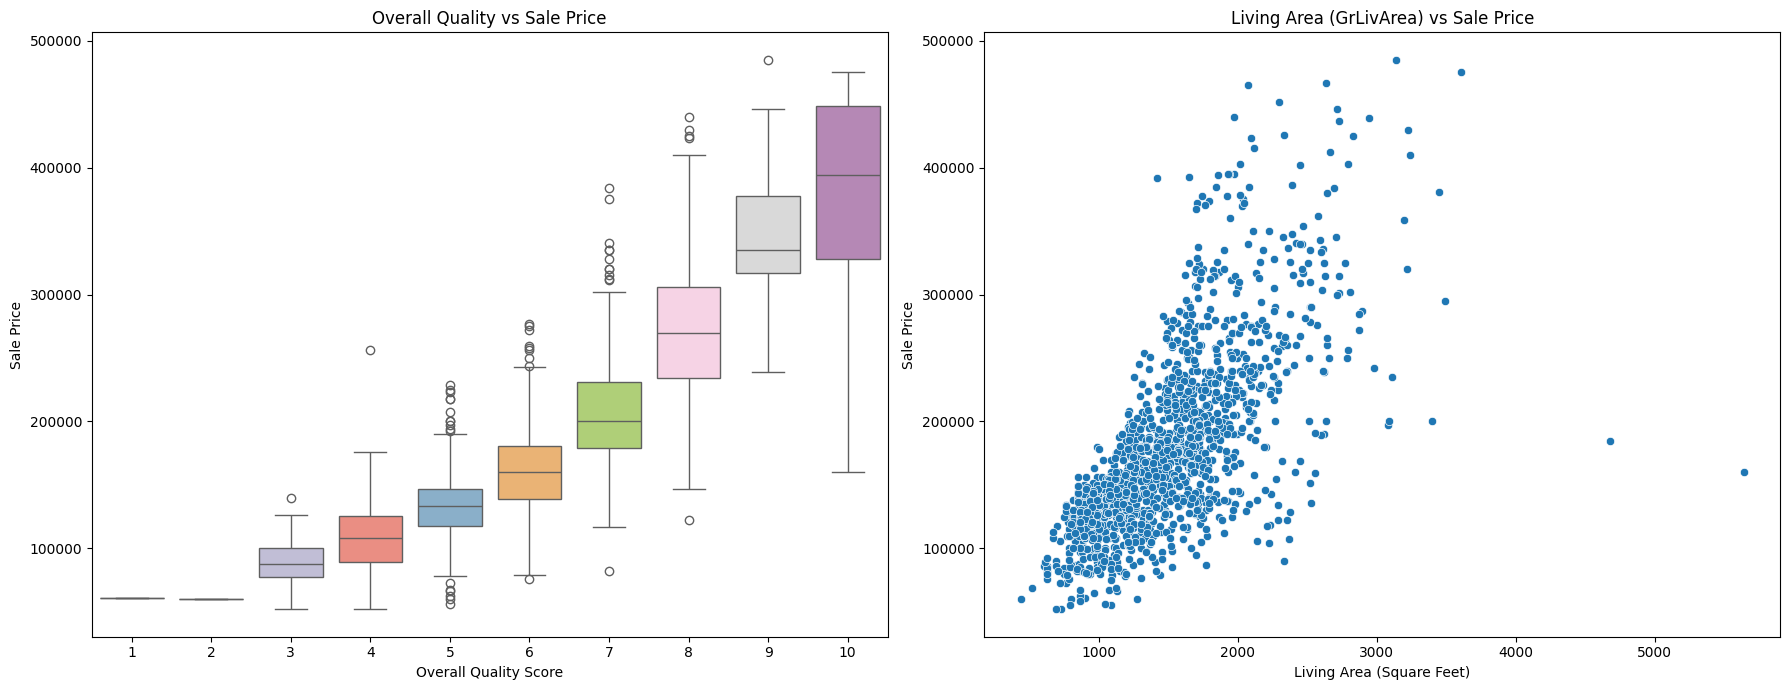

In [120]:
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

sns.boxplot(x='OverallQual', y='SalePrice', data=data_cleaned, ax=axes[0], palette='Set3')
axes[0].set_title('Overall Quality vs Sale Price')
axes[0].set_xlabel('Overall Quality Score')
axes[0].set_ylabel('Sale Price')

sns.scatterplot(x='GrLivArea', y='SalePrice', data=data_cleaned, ax=axes[1] )
axes[1].set_title('Living Area (GrLivArea) vs Sale Price')
axes[1].set_xlabel('Living Area (Square Feet)')
axes[1].set_ylabel('Sale Price')

plt.tight_layout()
plt.show()



In [121]:
print(top_cols)

Index(['SalePrice', 'SalePrice_log', 'OverallQual', 'GrLivArea', 'GarageCars',
       'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'YearBuilt',
       'YearRemodAdd', 'TotRmsAbvGrd', 'GarageYrBlt', 'Fireplaces',
       'MasVnrArea'],
      dtype='object')


In [122]:
cat_cols = data_cleaned.select_dtypes(include=['object', 'category']).columns

for col in cat_cols:
    most_frequent = data_cleaned[col].mode()[0]  
    data_cleaned[col].fillna(most_frequent, inplace=True)

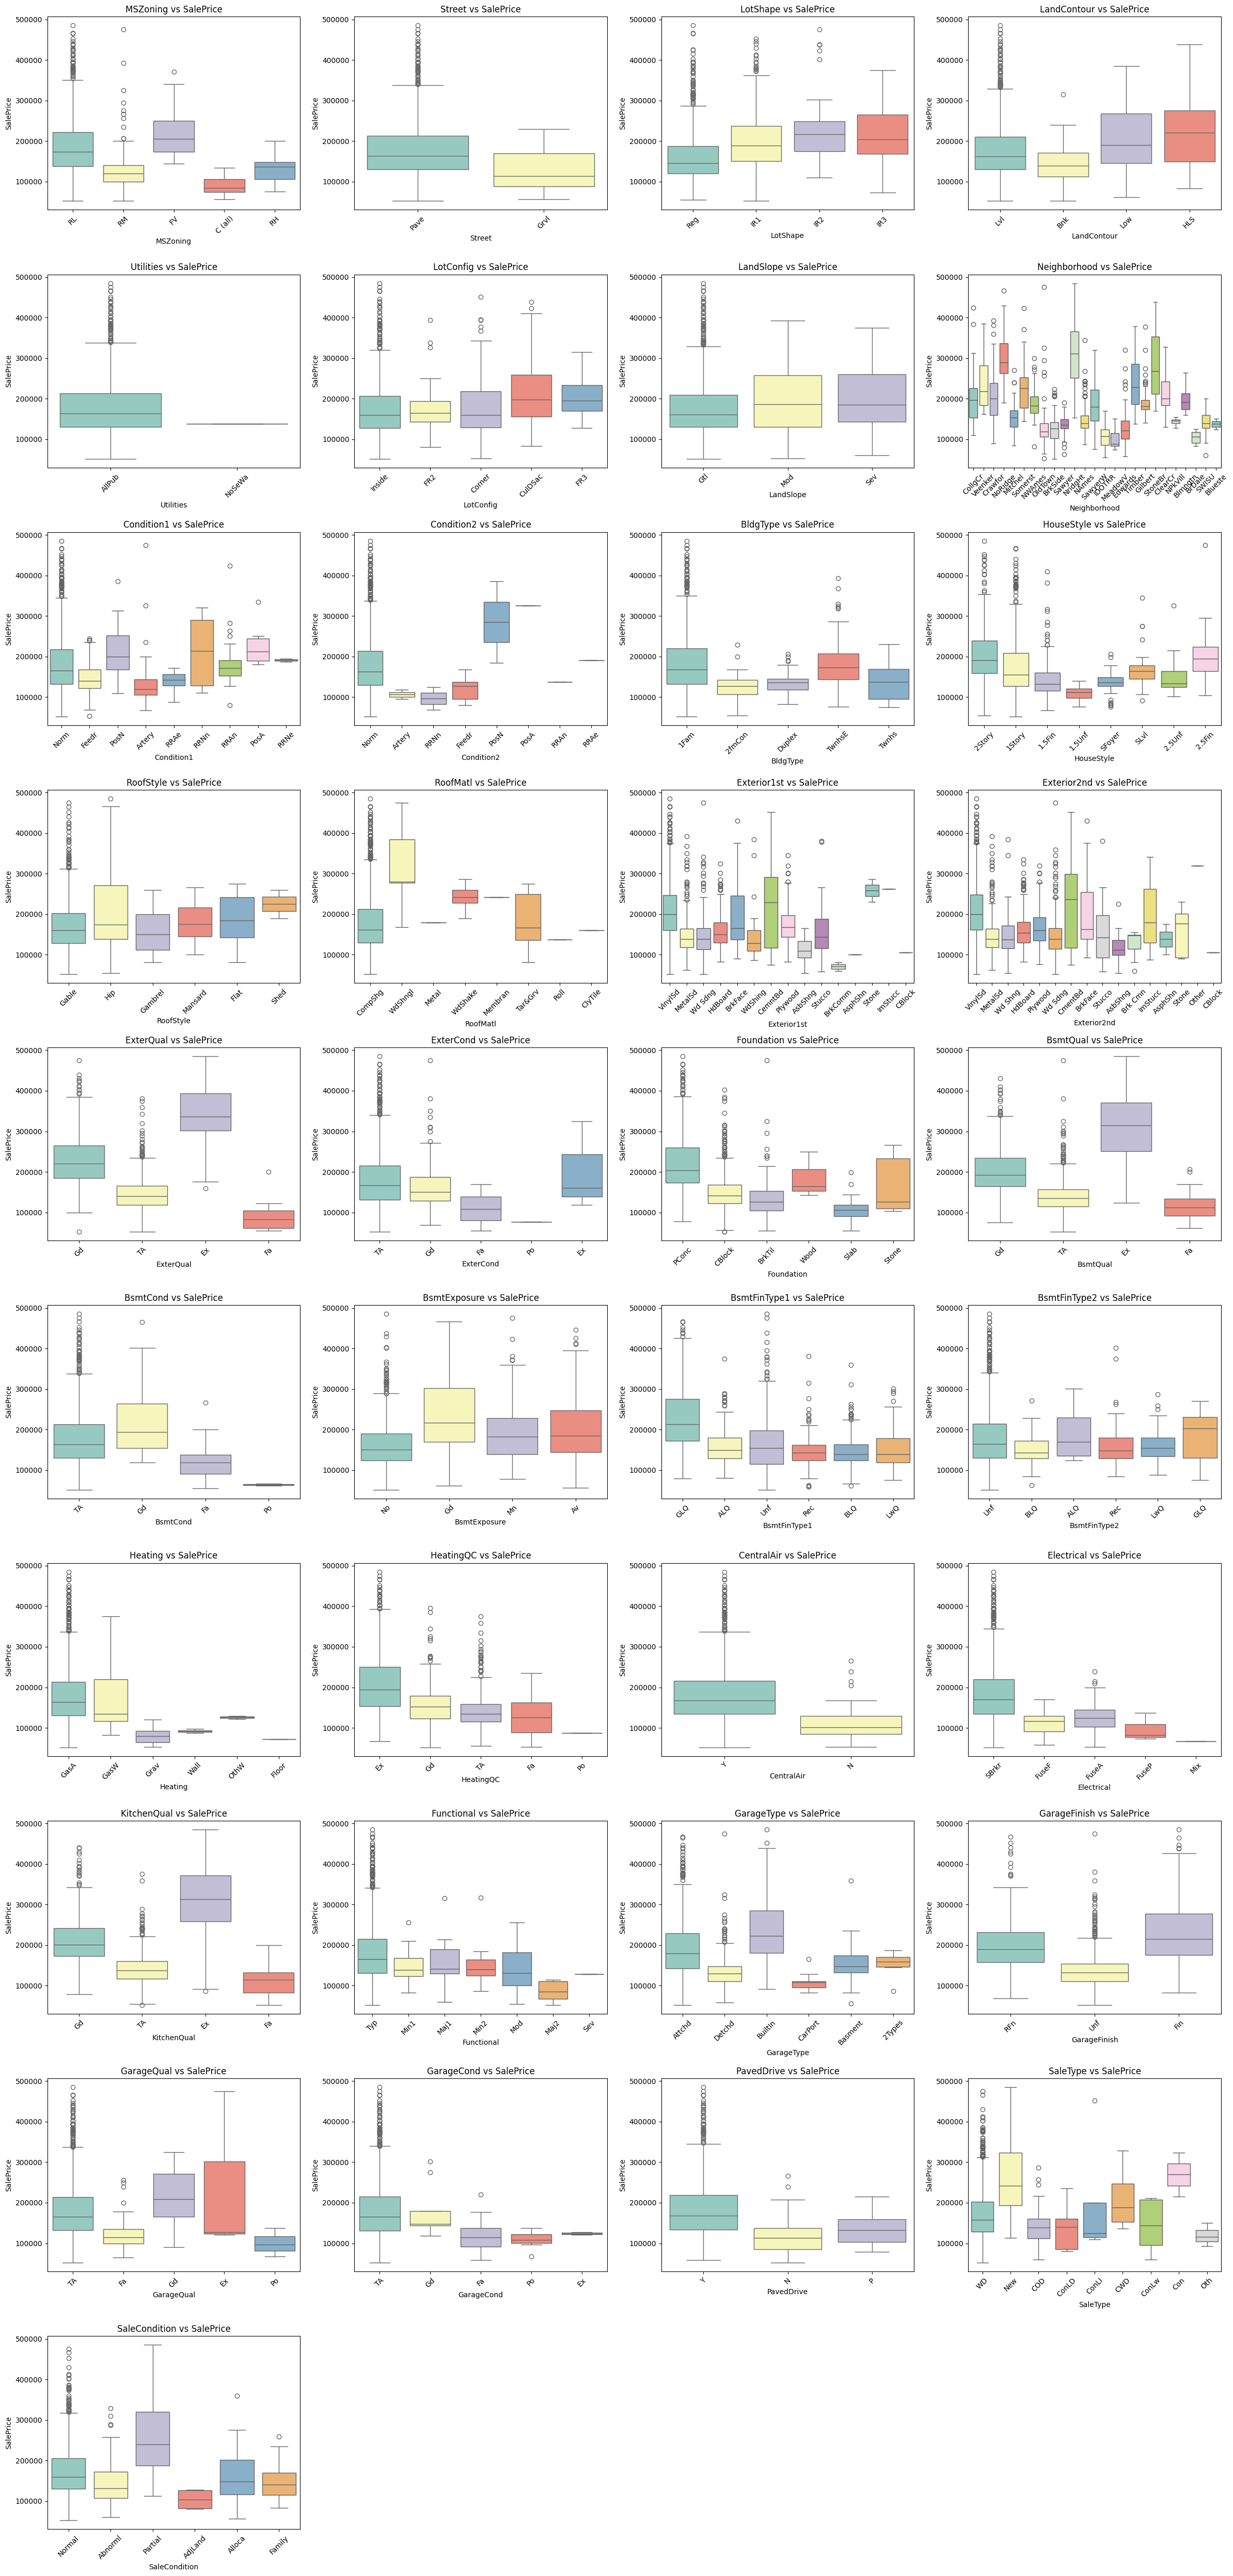

In [123]:
import matplotlib.pyplot as plt
import seaborn as sns

cat_cols = data_cleaned.select_dtypes(include=['object', 'category']).columns.tolist()
cols = cat_cols
cols_per_row = 4

rows = (len(cols) + cols_per_row - 1) // cols_per_row

plt.figure(figsize=(cols_per_row * 6, rows * 5))

for i, col in enumerate(cols, 1):
    plt.subplot(rows, cols_per_row, i)
    sns.boxplot(data=data_cleaned, x=col, y='SalePrice', palette='Set3')  
    plt.title(f'{col} vs SalePrice')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [124]:
num_cols = data_cleaned.select_dtypes(include='number').columns
data_cleaned[num_cols] = data_cleaned[num_cols].fillna(data_cleaned[num_cols].mean())

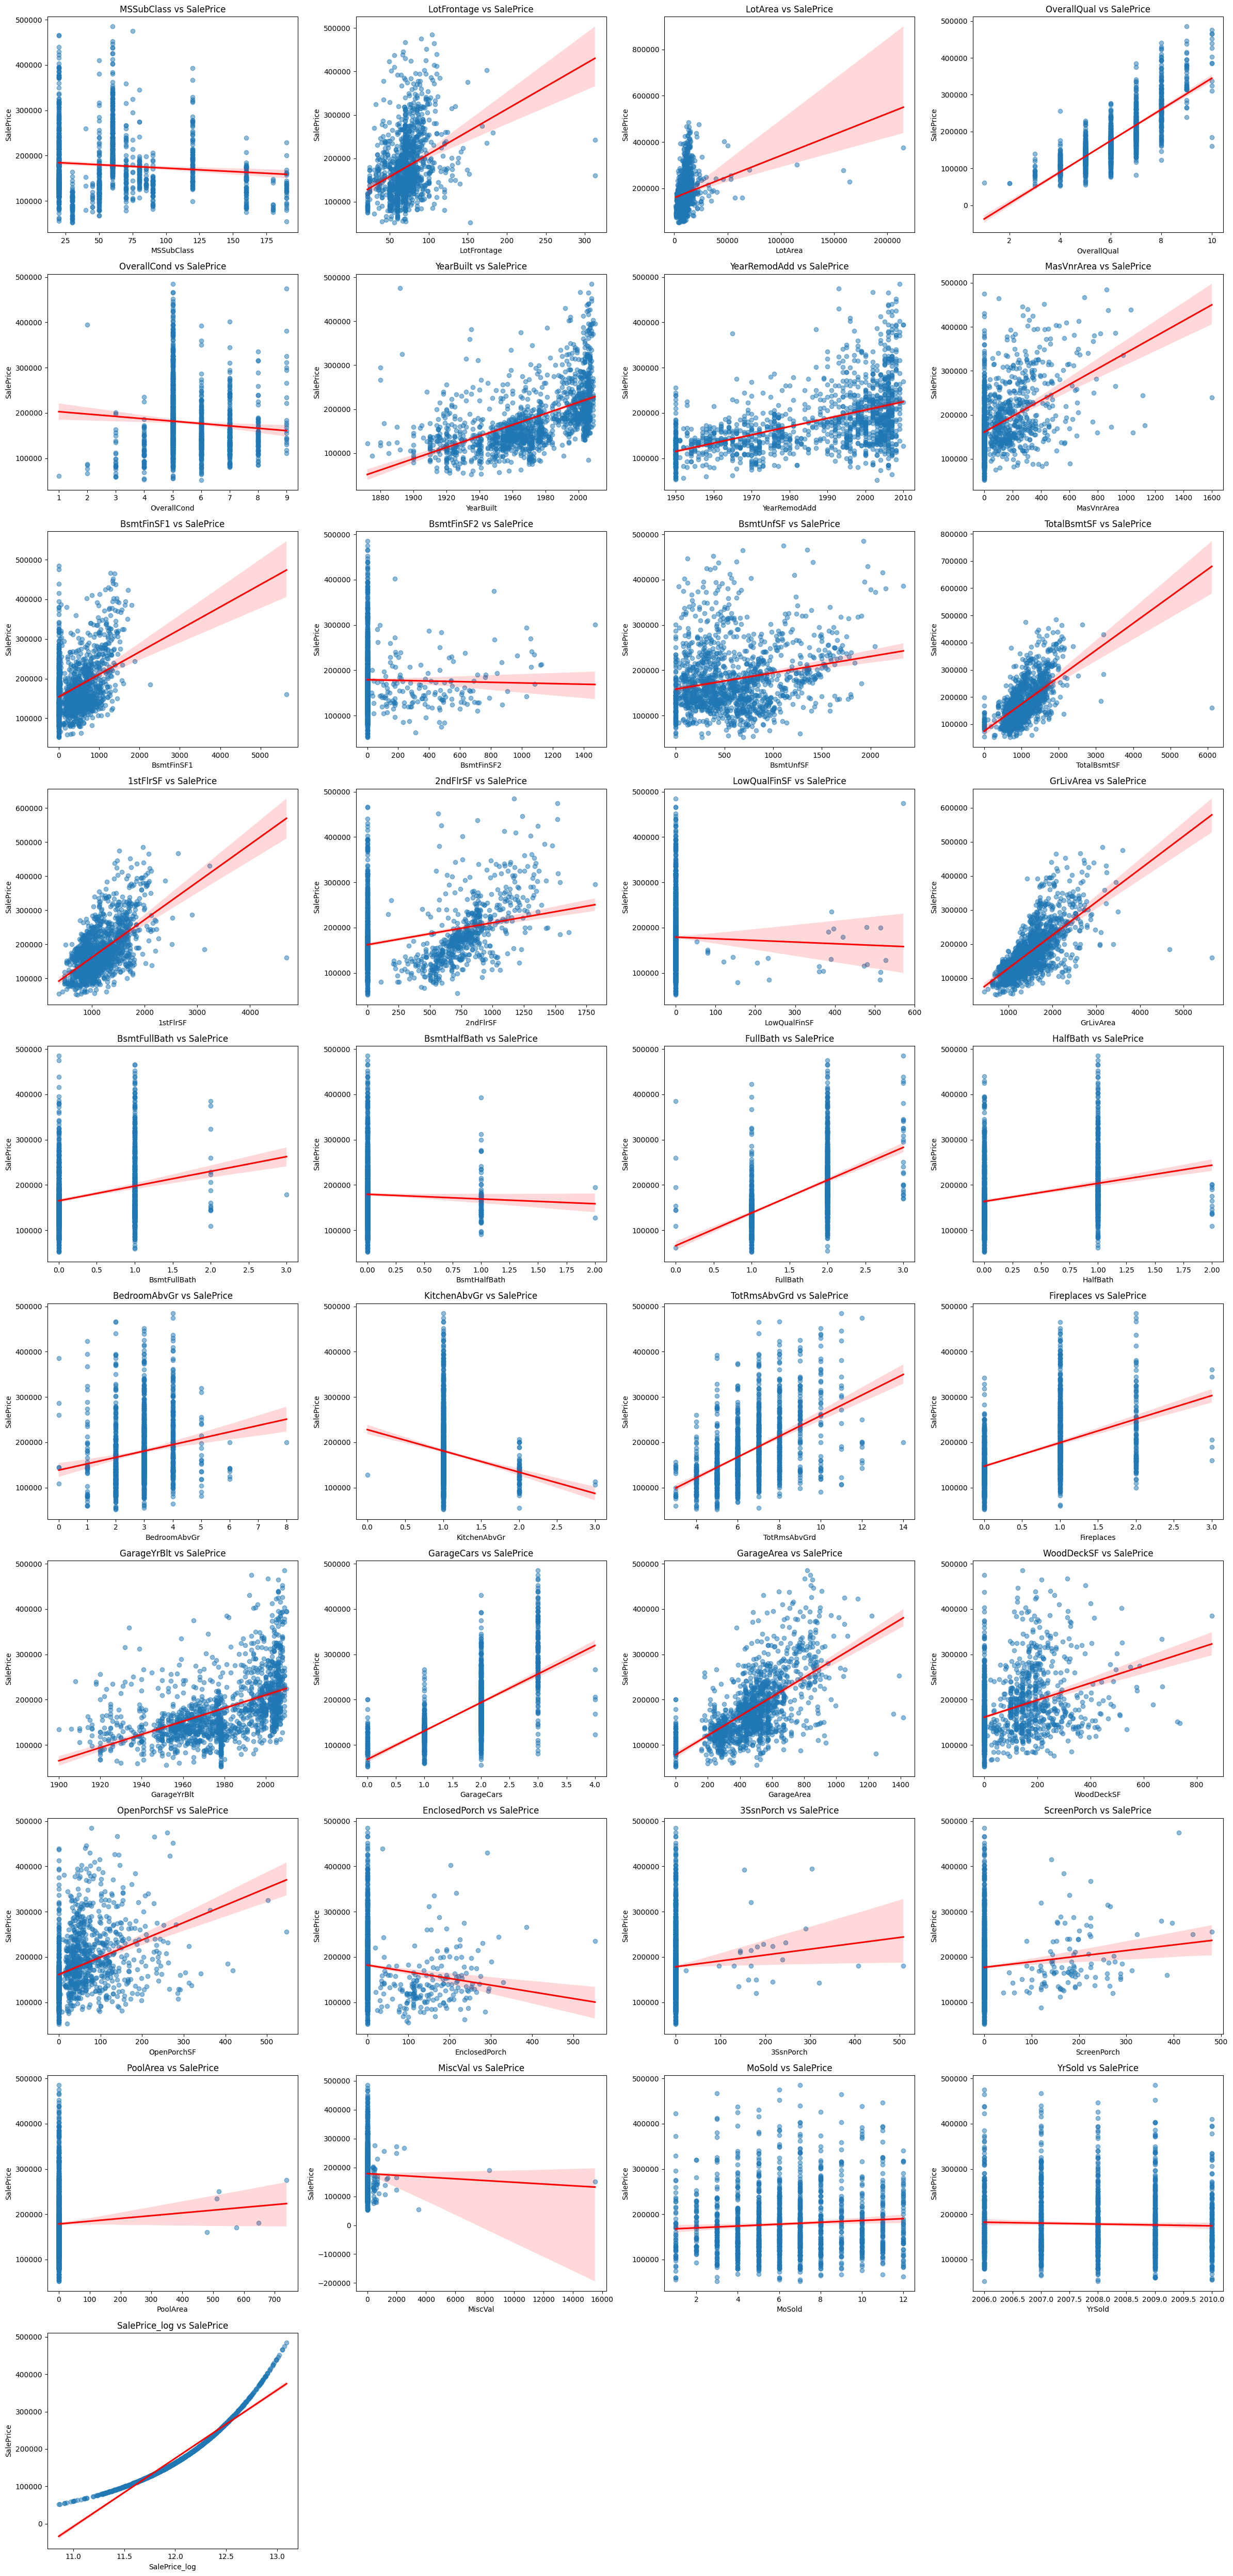

In [125]:
import matplotlib.pyplot as plt
import seaborn as sns
numeric_cols = data_cleaned.select_dtypes(include='number').drop(columns=['SalePrice']).columns.tolist()
cols_per_row = 4
rows = (len(numeric_cols) + cols_per_row - 1) // cols_per_row

plt.figure(figsize=(cols_per_row * 6, rows * 5))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(rows, cols_per_row, i)
    sns.regplot(data=data_cleaned, x=col, y='SalePrice', scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
    plt.title(f'{col} vs SalePrice')

plt.tight_layout()
plt.show()

<Axes: >

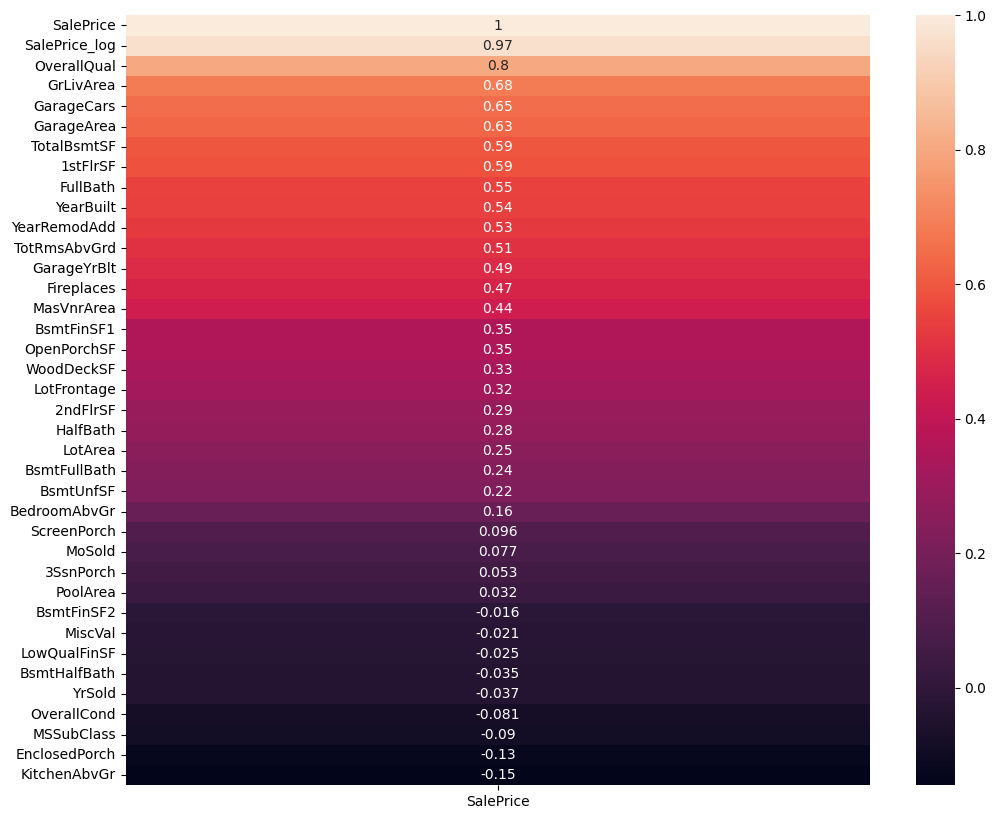

In [126]:
corr = data_cleaned.corr(numeric_only=True)
plt.figure(figsize=(12, 10))
sns.heatmap(corr[['SalePrice']].sort_values(by='SalePrice', ascending=False), annot=True)

In [127]:
top_corr = corr['SalePrice'].drop('SalePrice').sort_values(ascending=False)

top15_num_cols = top_corr.head(15).index.tolist()

cols_to_drop = ['TotRmsAbvGrd','YearBuilt', 'YearRemodAdd']

top15_num_cols = [col for col in top15_num_cols if col not in cols_to_drop]


print("Top 15 numerical features (after dropping):")
print(top15_num_cols)

Top 15 numerical features (after dropping):
['SalePrice_log', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'GarageYrBlt', 'Fireplaces', 'MasVnrArea', 'BsmtFinSF1']


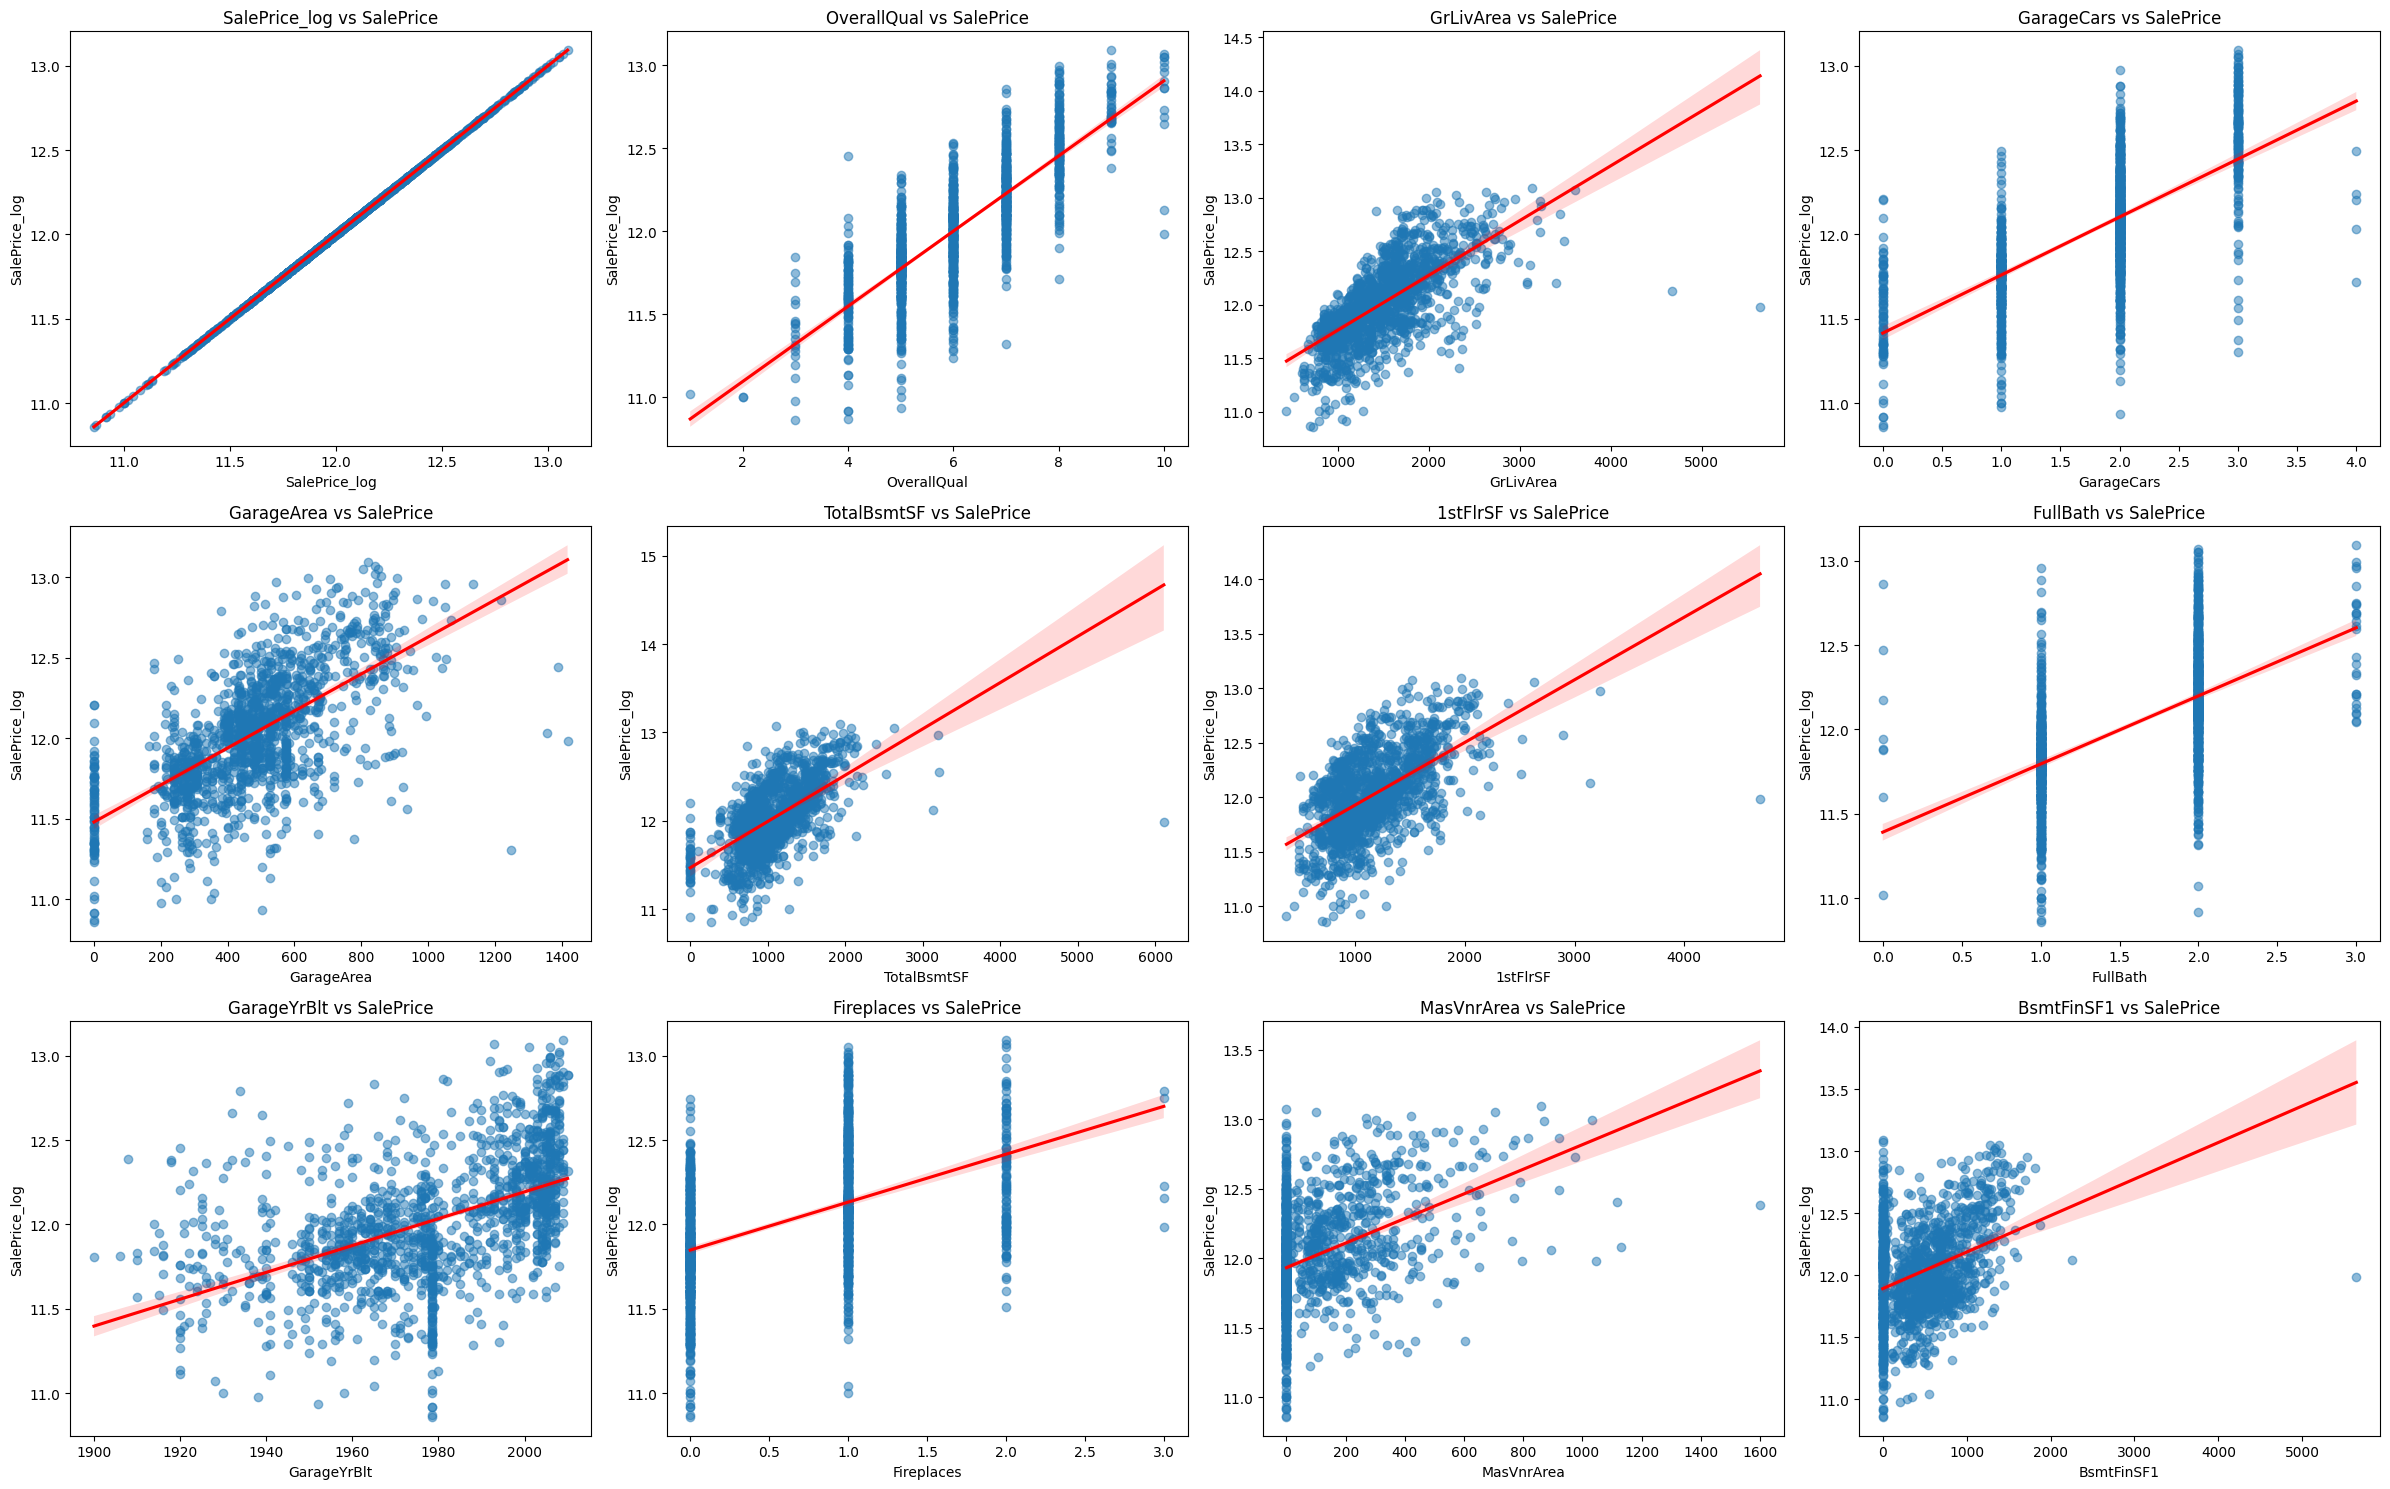

In [128]:
import matplotlib.pyplot as plt
import seaborn as sns
numeric_cols = top15_num_cols
cols_per_row = 4
rows = (len(numeric_cols) + cols_per_row - 1) // cols_per_row

plt.figure(figsize=(cols_per_row * 6, rows * 5))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(rows, cols_per_row, i)
    sns.regplot(data=data_cleaned, x=col, y='SalePrice_log', scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
    plt.title(f'{col} vs SalePrice')

plt.tight_layout()
plt.show()

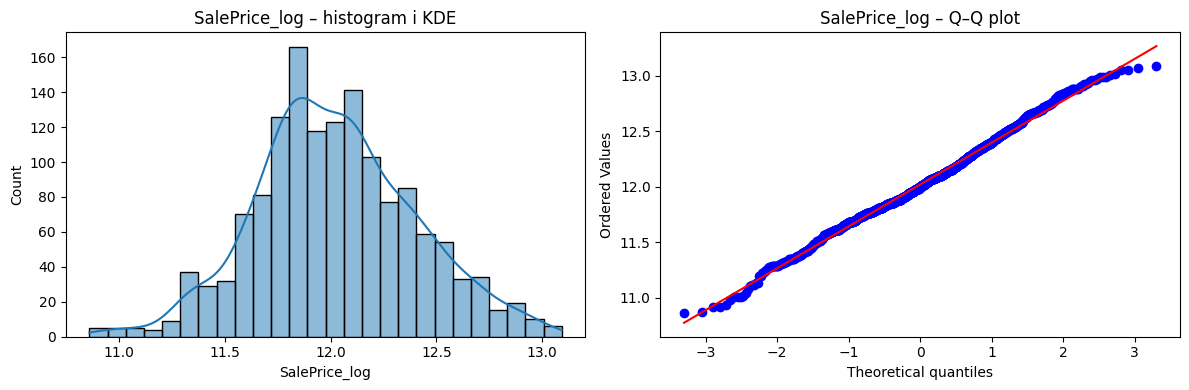

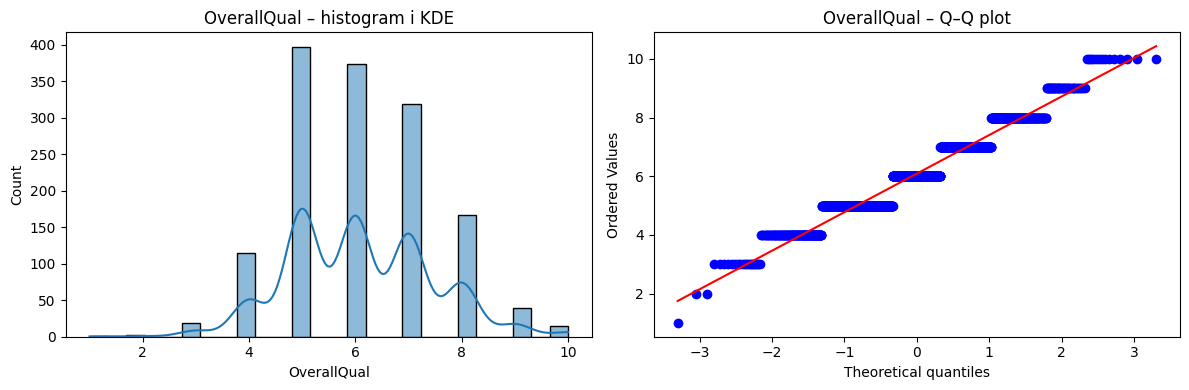

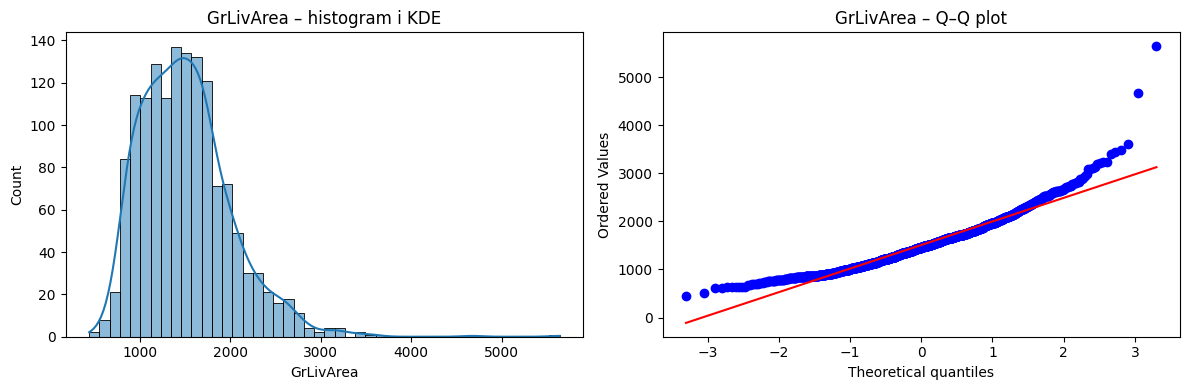

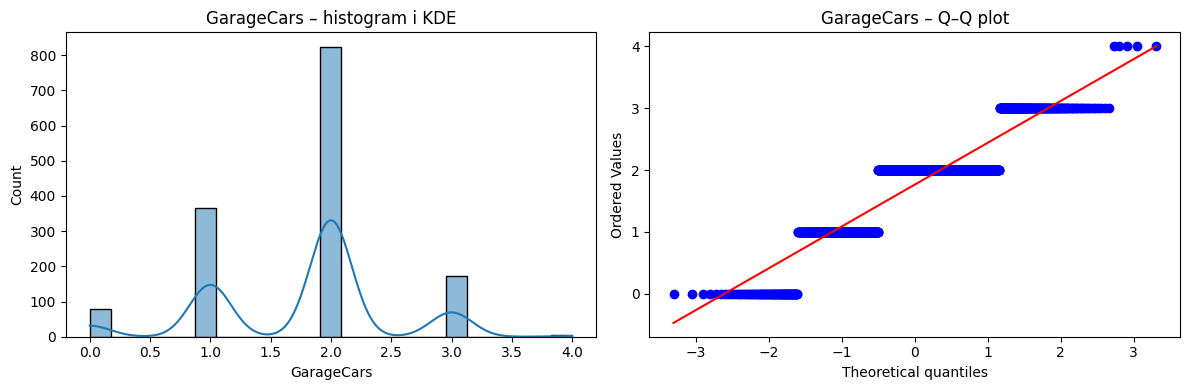

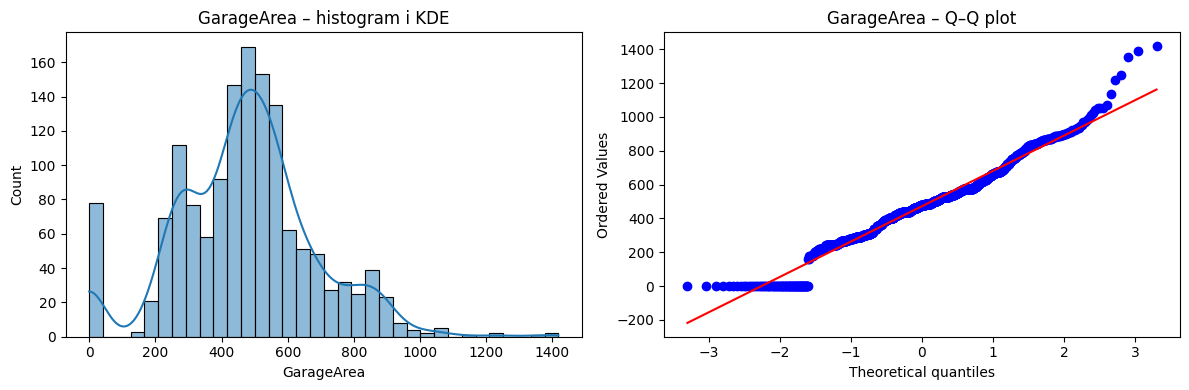

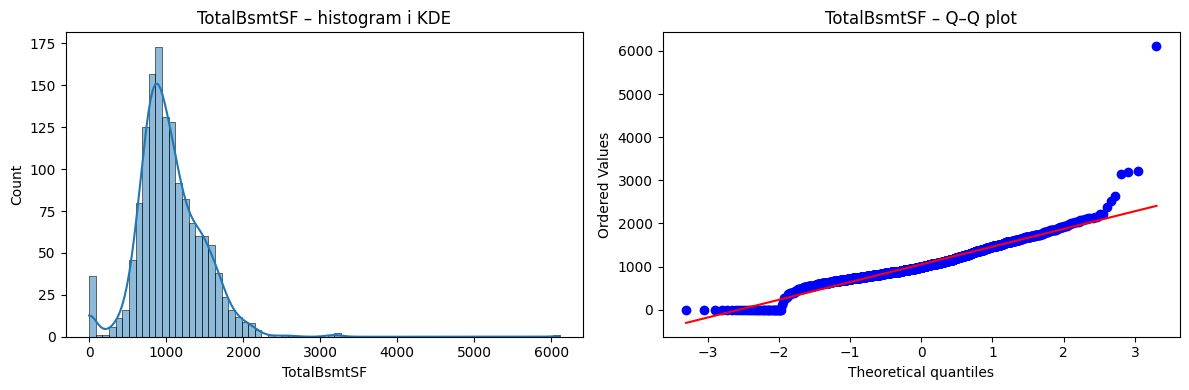

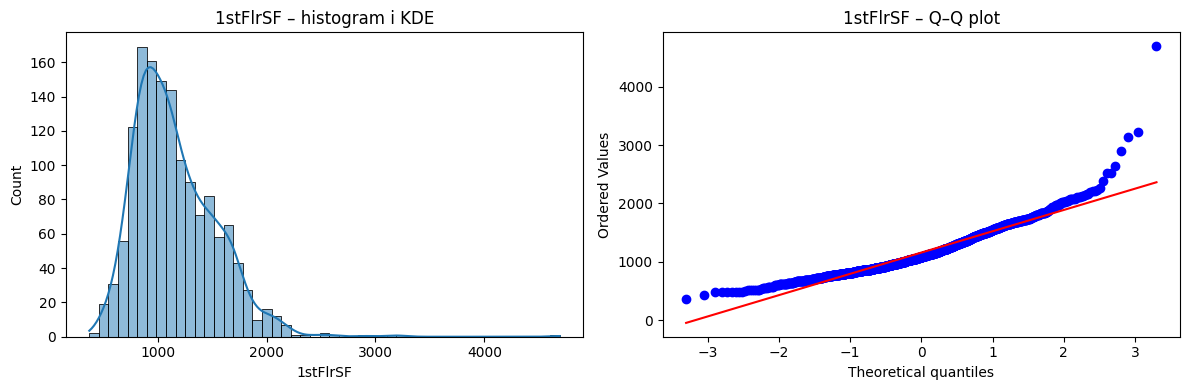

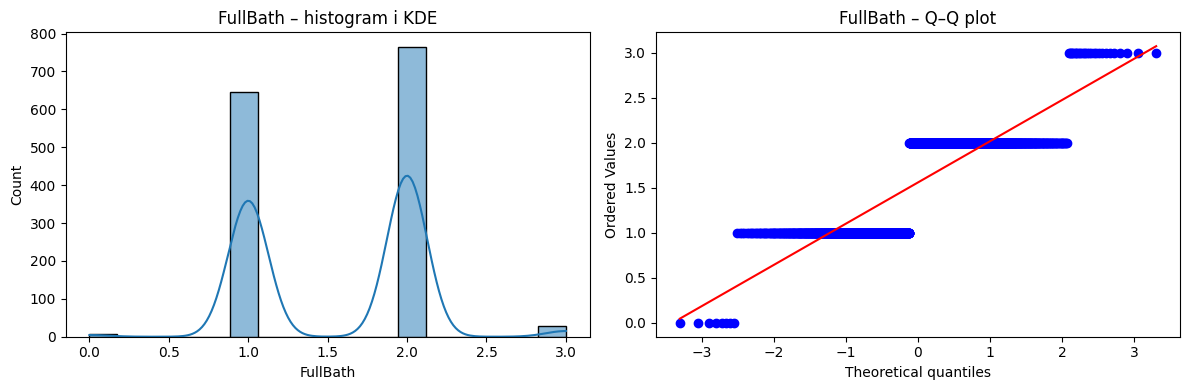

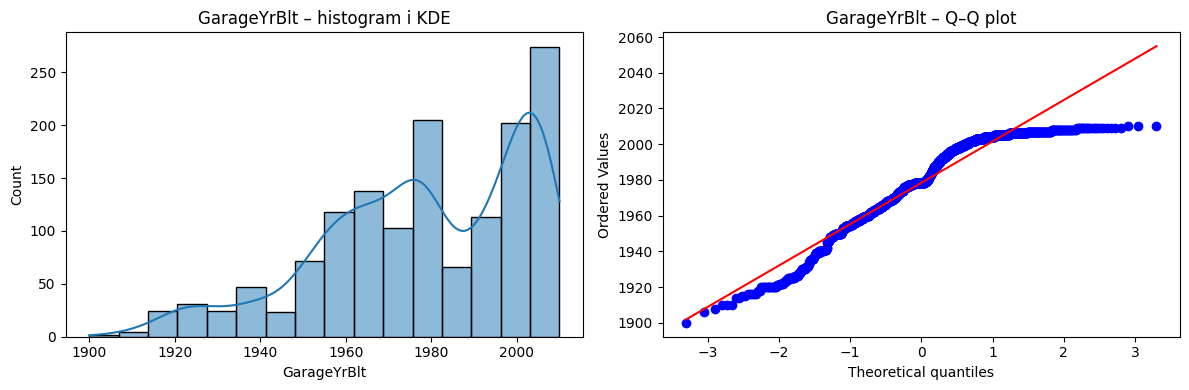

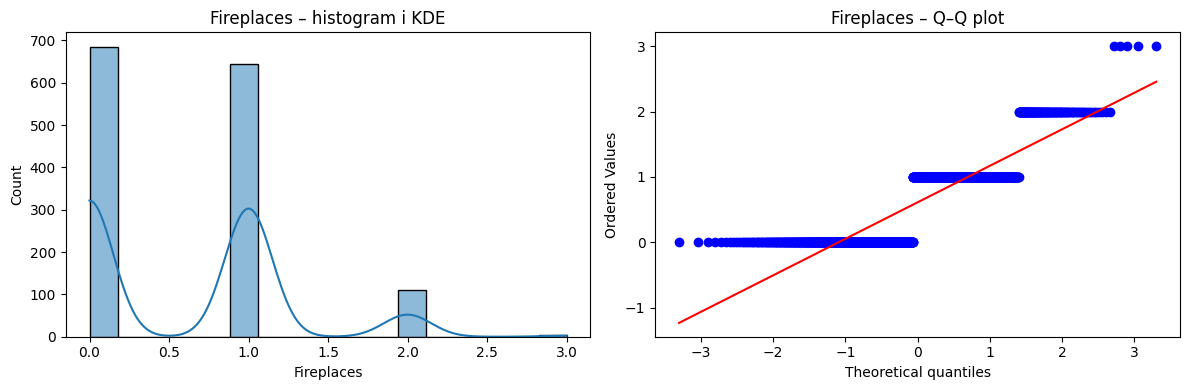

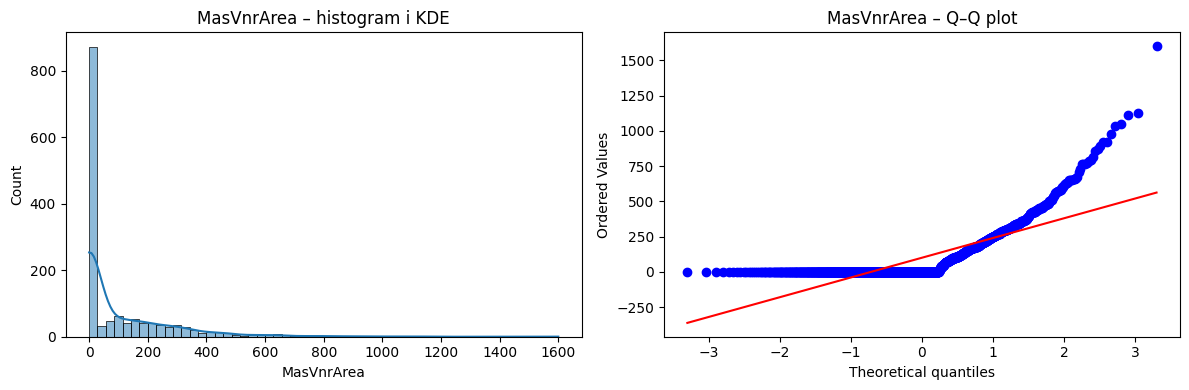

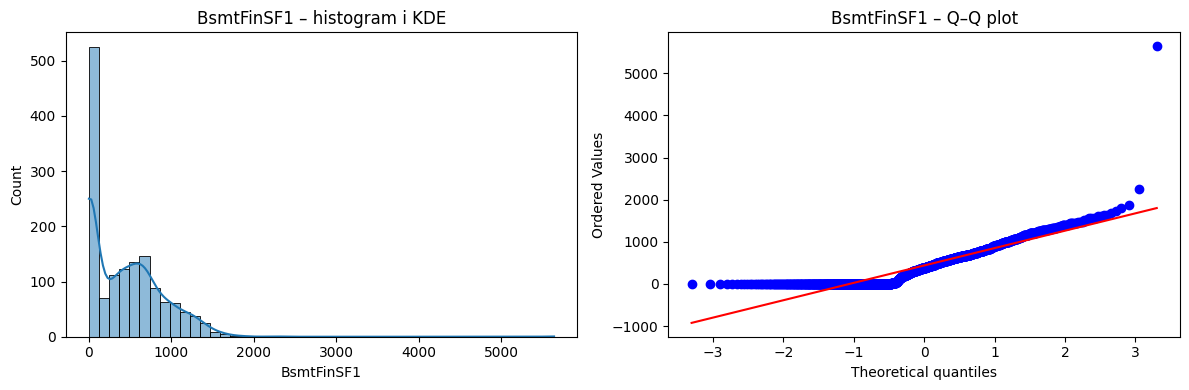

In [129]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

numeric_cols = top15_num_cols

for col in numeric_cols:
    plt.figure(figsize=(12,4))
    
    # a) Histogram + KDE
    plt.subplot(1,2,1)
    sns.histplot(data_cleaned[col].dropna(), kde=True)
    plt.title(f'{col} – histogram i KDE')
    
    # b) Q–Q plot
    plt.subplot(1,2,2)
    stats.probplot(data_cleaned[col].dropna(), dist="norm", plot=plt)
    plt.title(f'{col} – Q–Q plot')
    
    plt.tight_layout()
    plt.show()



In [130]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

data_cleaned['PriceCategory'] = pd.qcut(data_cleaned['SalePrice'], q=3, labels=['low', 'medium', 'high'])
from sklearn.preprocessing import LabelEncoder

le_target = LabelEncoder()
y = le_target.fit_transform(data_cleaned['PriceCategory'])
cat_cols = [col for col in cat_cols if col in data_cleaned.columns]


X = data_cleaned[cat_cols].apply(LabelEncoder().fit_transform)
from sklearn.feature_selection import SelectKBest, chi2

selector = SelectKBest(score_func=chi2, k='all')  
selector.fit(X, y)


chi2_scores = pd.Series(selector.scores_, index=cat_cols)
chi2_scores = chi2_scores.sort_values(ascending=False)
print("Top categorical features based on test chi²:")
print(chi2_scores.head(20))

Top categorical features based on test chi²:
HeatingQC        528.651816
GarageType       337.390596
GarageFinish     236.807851
LotShape         123.700922
HouseStyle       121.329795
BsmtQual         120.736055
KitchenQual      104.513082
Foundation        93.555700
ExterQual         80.422242
Neighborhood      64.306391
BsmtExposure      49.458541
Exterior2nd       39.957319
Exterior1st       33.064139
Electrical        30.566381
BsmtFinType1      20.650462
SaleCondition     20.505656
BldgType          20.451177
MSZoning          14.004297
PavedDrive        11.796713
Condition1         8.877878
dtype: float64


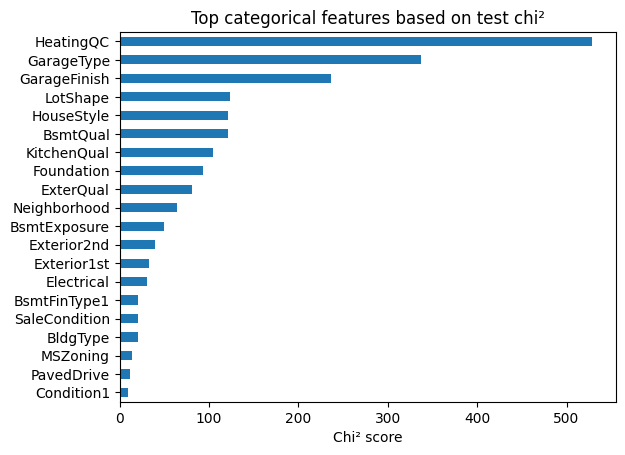

In [131]:
import matplotlib.pyplot as plt

chi2_scores.head(20).plot(kind='barh', title='Top categorical features based on test chi²')
plt.xlabel('Chi² score')
plt.gca().invert_yaxis()
plt.show()

In [132]:
chi2_scores = pd.Series(selector.scores_, index=cat_cols).sort_values(ascending=False)
top10_cat_cols = chi2_scores.head(10).index.tolist()

print("Top 10 categorical columns:")
print(top10_cat_cols)

Top 10 categorical columns:
['HeatingQC', 'GarageType', 'GarageFinish', 'LotShape', 'HouseStyle', 'BsmtQual', 'KitchenQual', 'Foundation', 'ExterQual', 'Neighborhood']


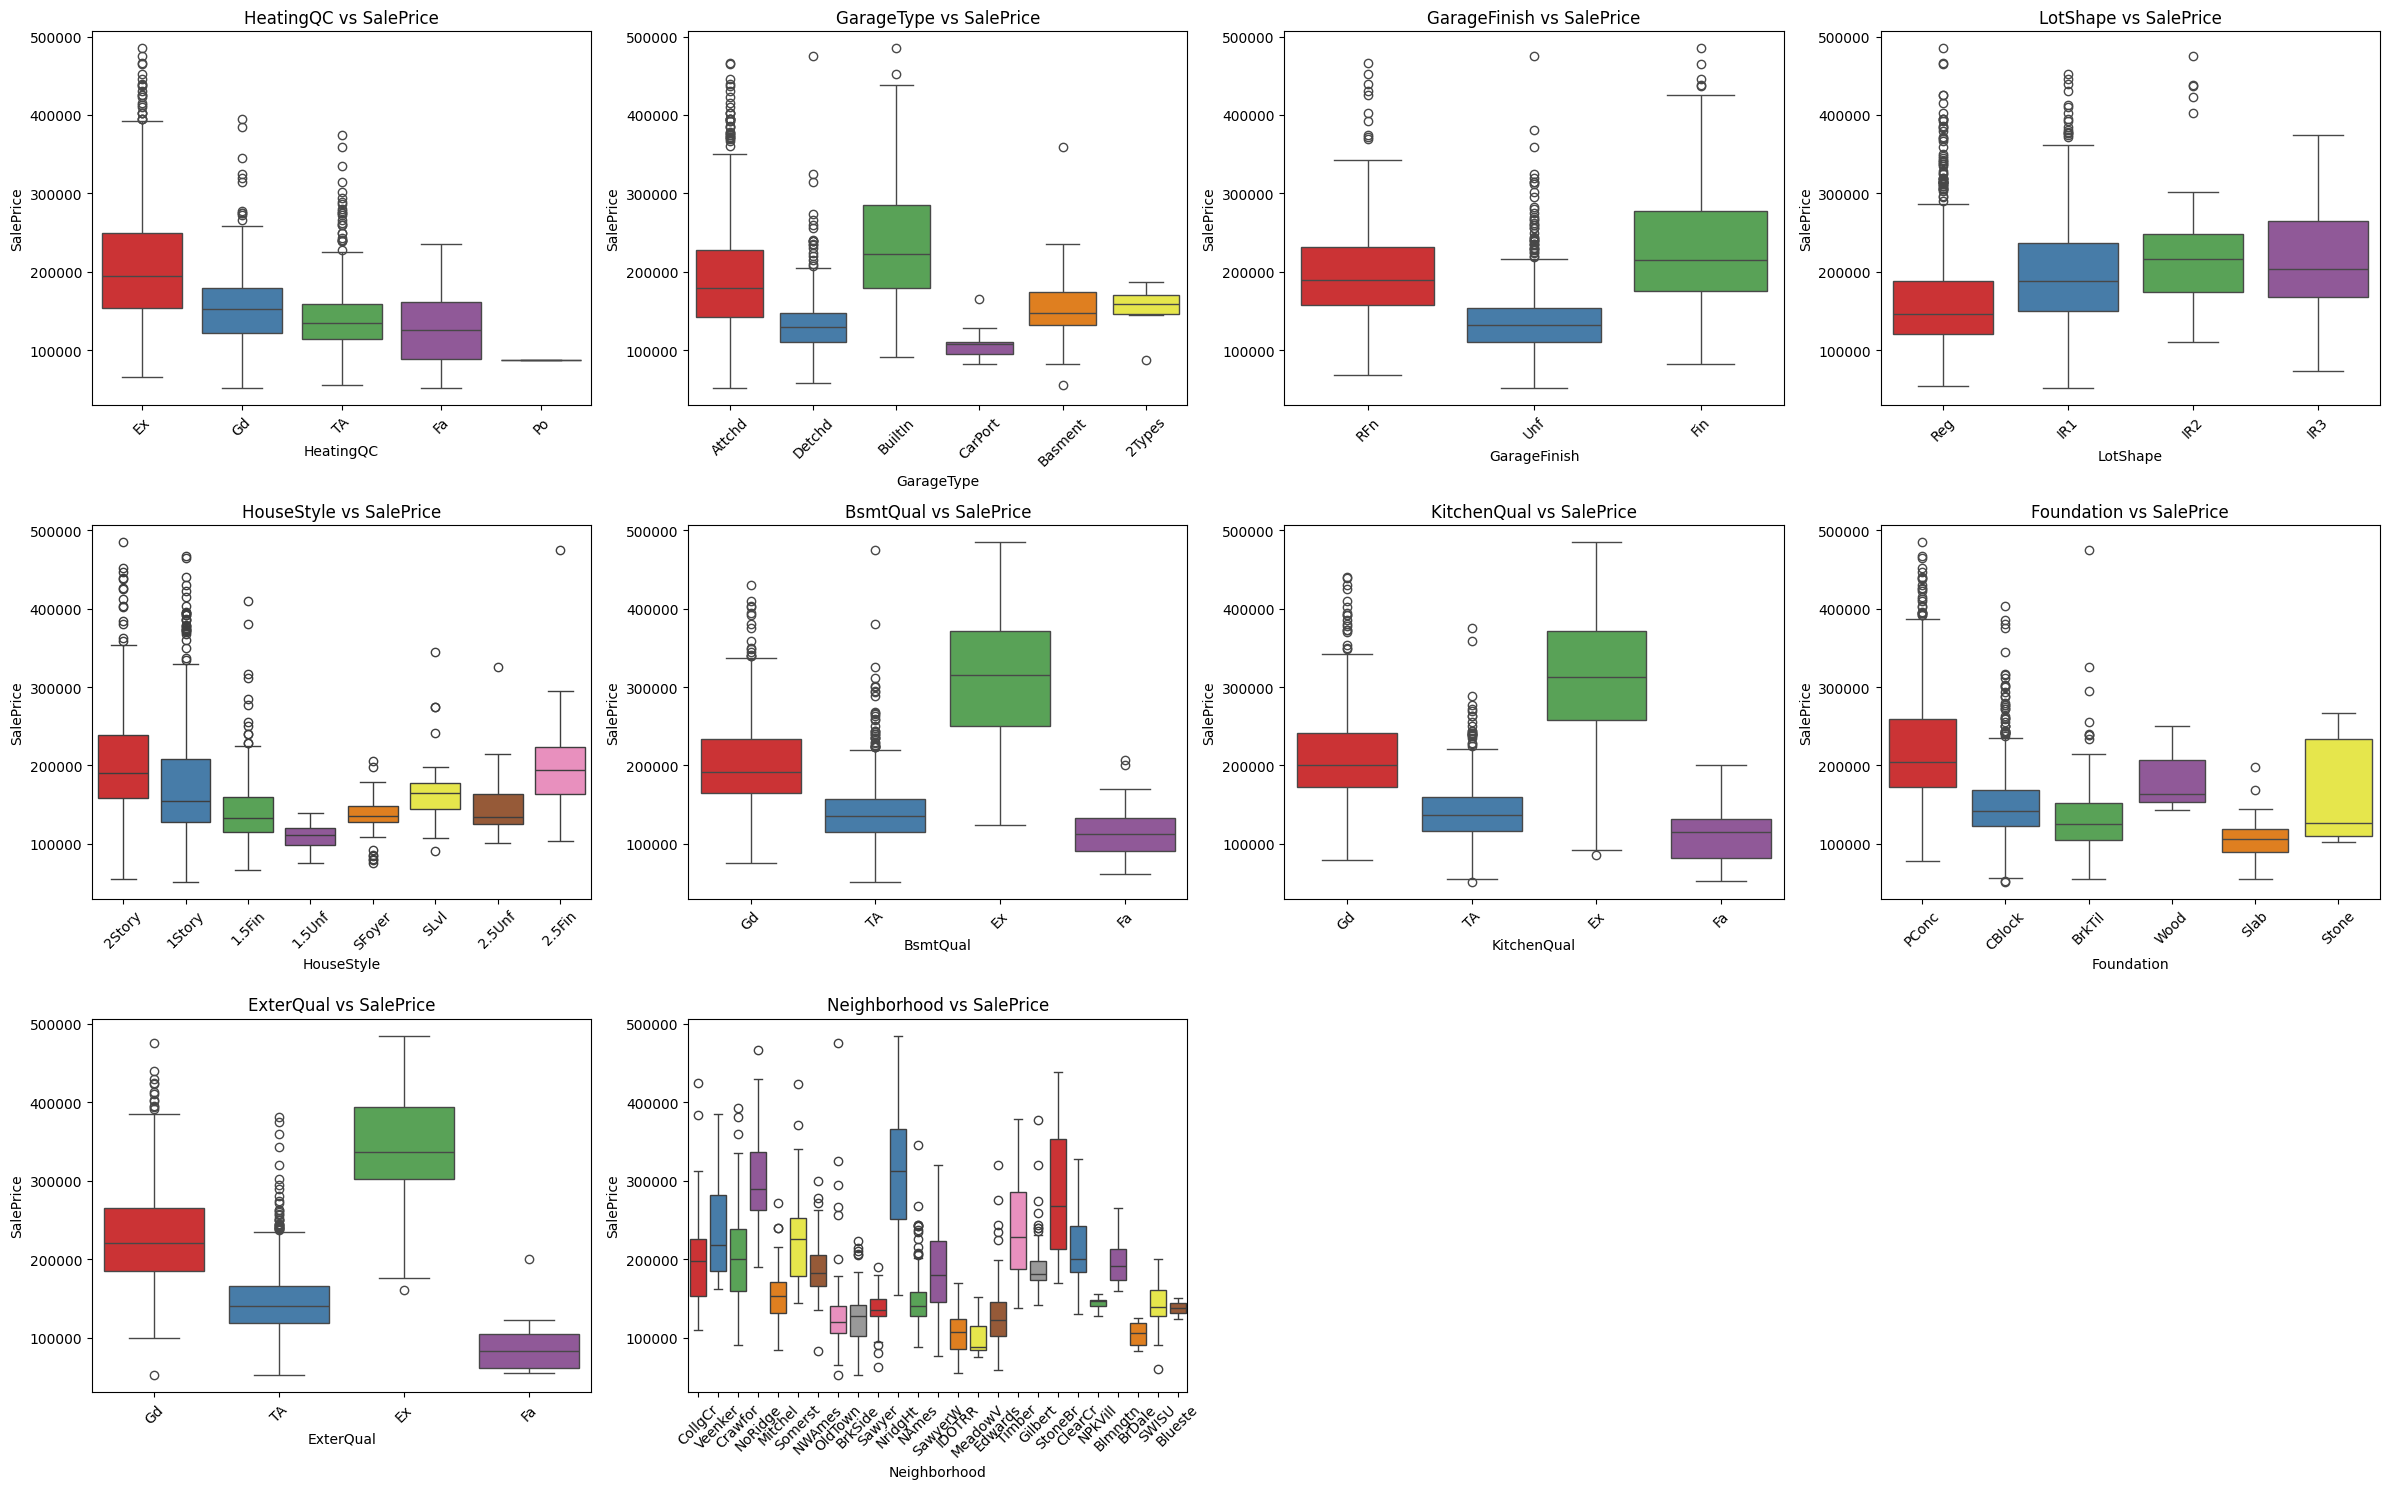

In [134]:
import matplotlib.pyplot as plt
import seaborn as sns

cat_cols = top10_cat_cols
cols = cat_cols
cols_per_row = 4

rows = (len(cols) + cols_per_row - 1) // cols_per_row

plt.figure(figsize=(cols_per_row * 6, rows * 5))

for i, col in enumerate(cols, 1):
    plt.subplot(rows, cols_per_row, i)
    sns.boxplot(data=data_cleaned, x=col, y='SalePrice', palette='Set1')  
    plt.title(f'{col} vs SalePrice')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [135]:
selected_features = top15_num_cols + top10_cat_cols
selected_features.remove("SalePrice_log")
print(selected_features)

['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'GarageYrBlt', 'Fireplaces', 'MasVnrArea', 'BsmtFinSF1', 'HeatingQC', 'GarageType', 'GarageFinish', 'LotShape', 'HouseStyle', 'BsmtQual', 'KitchenQual', 'Foundation', 'ExterQual', 'Neighborhood']


In [136]:
X_model = data_cleaned[selected_features]
y_model = data_cleaned['SalePrice_log']

X_model_encoded = pd.get_dummies(X_model, columns=top10_cat_cols, drop_first=True)

In [137]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_model_encoded, y_model, test_size=0.2, random_state=42)

In [138]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [140]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_squared_log_error
import numpy as np

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)



print("Linear Regression:")
print("R²:", r2_score(y_test, y_pred_lr))
print("RMSE:", mean_squared_error(y_test, y_pred_lr,))
print("RMSLE:", np.sqrt(mean_squared_log_error(y_test, y_pred_lr)))

Linear Regression:
R²: 0.8718408306677242
RMSE: 0.015724573173017016
RMSLE: 0.00976257029428764
